In [1]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=c710b6064a80d501f17d1a7e87fc5bb78f9d0cfc2a5d7339f196f73dc39a5326
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('crews-cup-data.csv')

In [3]:
df.head()

,id,a1,a2,a3,n1,n2,n3,e1,e2,e3,...,f3,h1,h2,h3,origination,classes,contribution,csat,intent,treatment
0,ZZ5Y8KRG,7,5,6,2,3,2,1,2,2,...,4,4,4,3,2021,42,388.78,4,4,Subscription
1,BSY3UQK4,6,7,5,2,1,1,7,7,7,...,3,6,6,5,2016,231,2403.93,5,6,New Product
2,IQS5X01P,4,5,6,2,1,1,1,1,1,...,1,1,1,1,2021,48,389.09,6,3,Subscription
3,QVPNES90,7,7,7,1,1,1,7,6,6,...,5,7,6,7,2014,513,4812.88,4,5,Ad
4,NWC42HTR,5,3,5,2,1,2,3,2,1,...,1,1,2,1,2022,16,152.25,6,3,Subscription


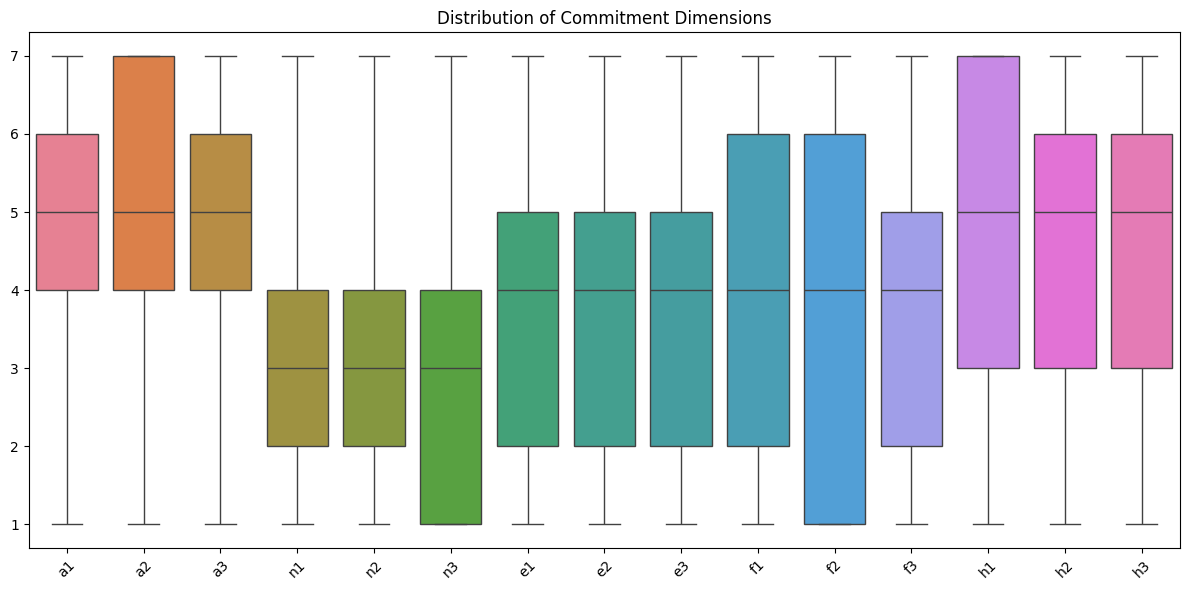

In [4]:
# Create a boxplot for commitment dimensions
commitment_items = ['a1', 'a2', 'a3', 'n1', 'n2', 'n3', 'e1', 'e2', 'e3', 'f1', 'f2', 'f3', 'h1', 'h2', 'h3']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[commitment_items])
plt.title('Distribution of Commitment Dimensions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Commitment Scores:
Affective Commitment: 5.28
Normative Commitment: 3.06
Economic Commitment: 3.74
Forced Commitment: 3.72
Habitual Commitment: 4.54


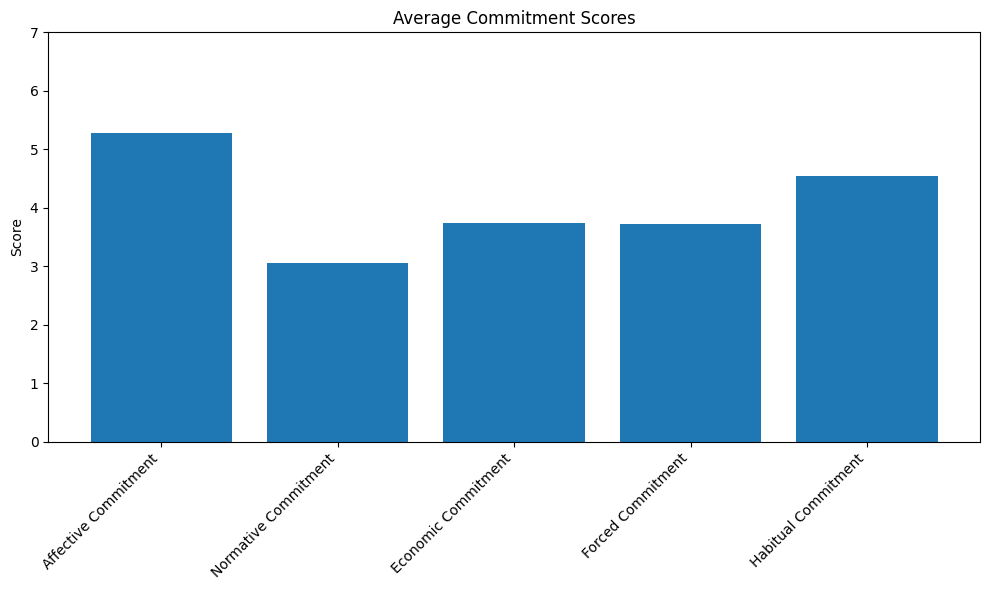

In [18]:
# Define the columns for each commitment type
affective_cols = ['a1', 'a2', 'a3']
normative_cols = ['n1', 'n2', 'n3']
economic_cols = ['e1', 'e2', 'e3']
forced_cols = ['f1', 'f2', 'f3']
habitual_cols = ['h1', 'h2', 'h3']

# Calculate average scores for each commitment type
df['Affective_Commitment'] = df[affective_cols].mean(axis=1)
df['Normative_Commitment'] = df[normative_cols].mean(axis=1)
df['Economic_Commitment'] = df[economic_cols].mean(axis=1)
df['Forced_Commitment'] = df[forced_cols].mean(axis=1)
df['Habitual_Commitment'] = df[habitual_cols].mean(axis=1)

# Calculate overall average scores
avg_scores = {
    'Affective Commitment': df['Affective_Commitment'].mean(),
    'Normative Commitment': df['Normative_Commitment'].mean(),
    'Economic Commitment': df['Economic_Commitment'].mean(),
    'Forced Commitment': df['Forced_Commitment'].mean(),
    'Habitual Commitment': df['Habitual_Commitment'].mean()
}

# Print the results
print("Average Commitment Scores:")
for commitment_type, score in avg_scores.items():
    print(f"{commitment_type}: {score:.2f}")


plt.figure(figsize=(10, 6))
plt.bar(avg_scores.keys(), avg_scores.values())
plt.title('Average Commitment Scores')
plt.ylabel('Score')
plt.ylim(0, 7)  # Assuming 7-point scale
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

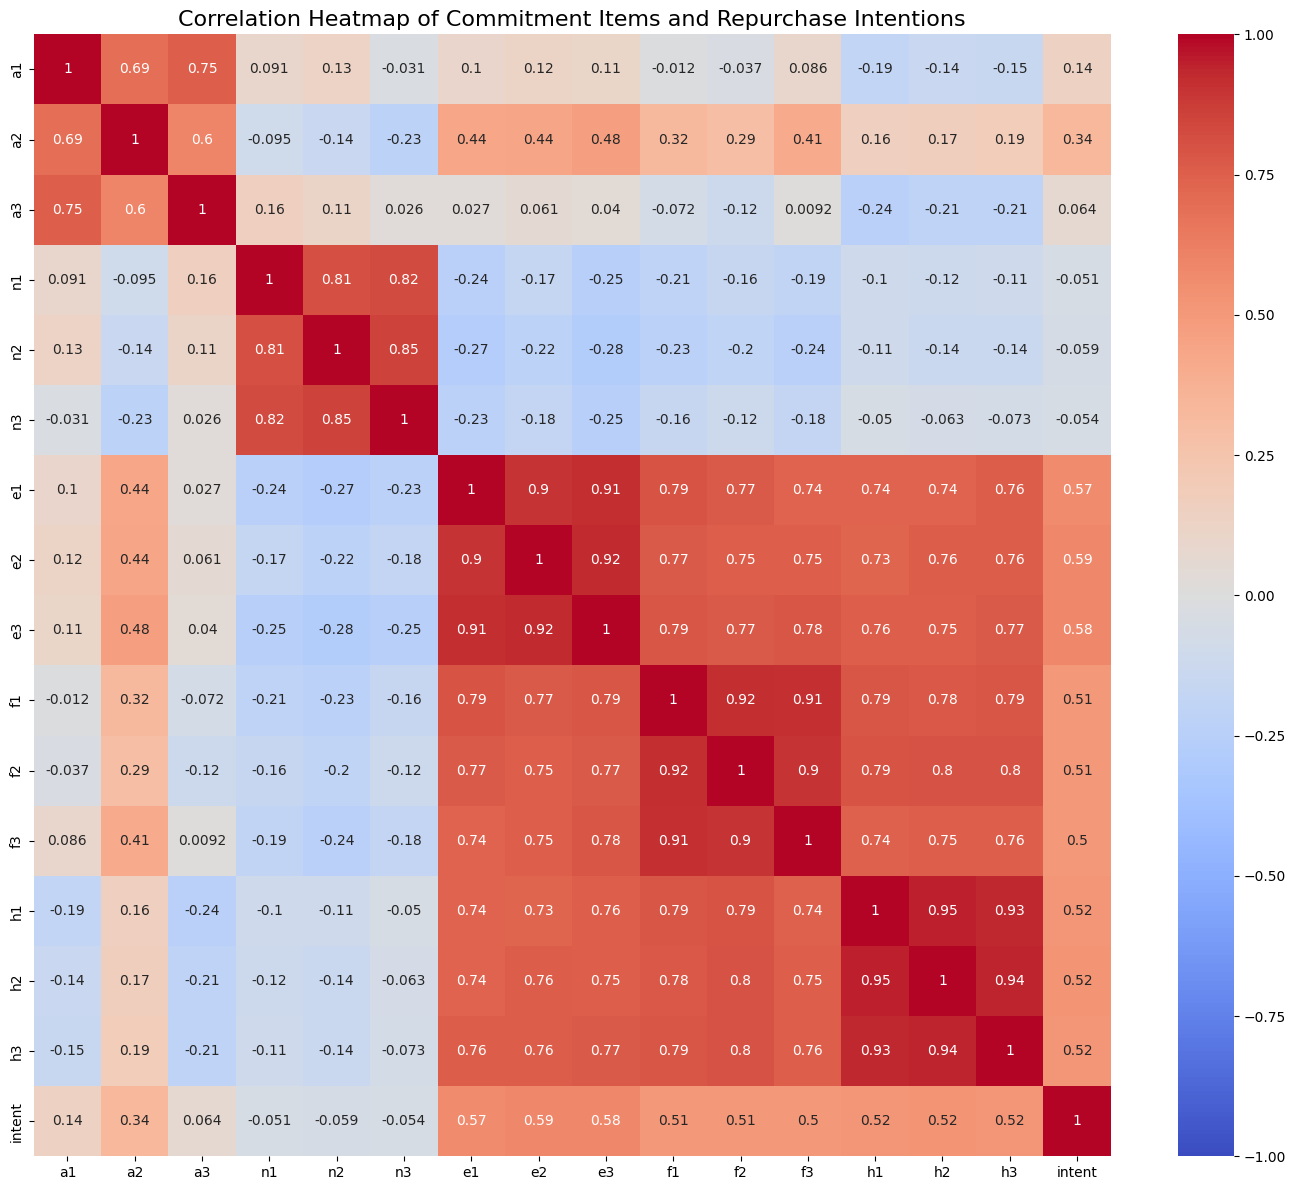

In [5]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df[commitment_items + ['intent']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Commitment Items and Repurchase Intentions', fontsize=16)
plt.tight_layout()
plt.show()

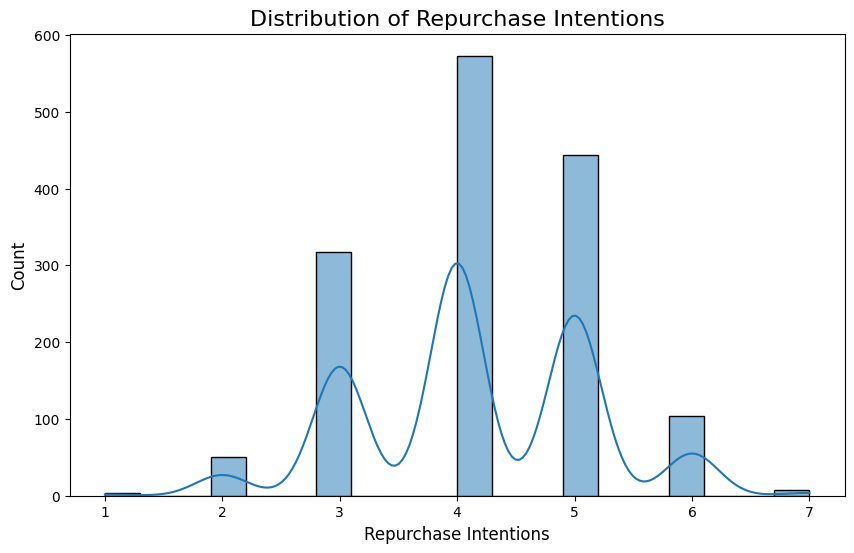

In [6]:
# 7. Distribution of Repurchase Intentions
plt.figure(figsize=(10, 6))
sns.histplot(df['intent'], kde=True, bins=20)
plt.title('Distribution of Repurchase Intentions', fontsize=16)
plt.xlabel('Repurchase Intentions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

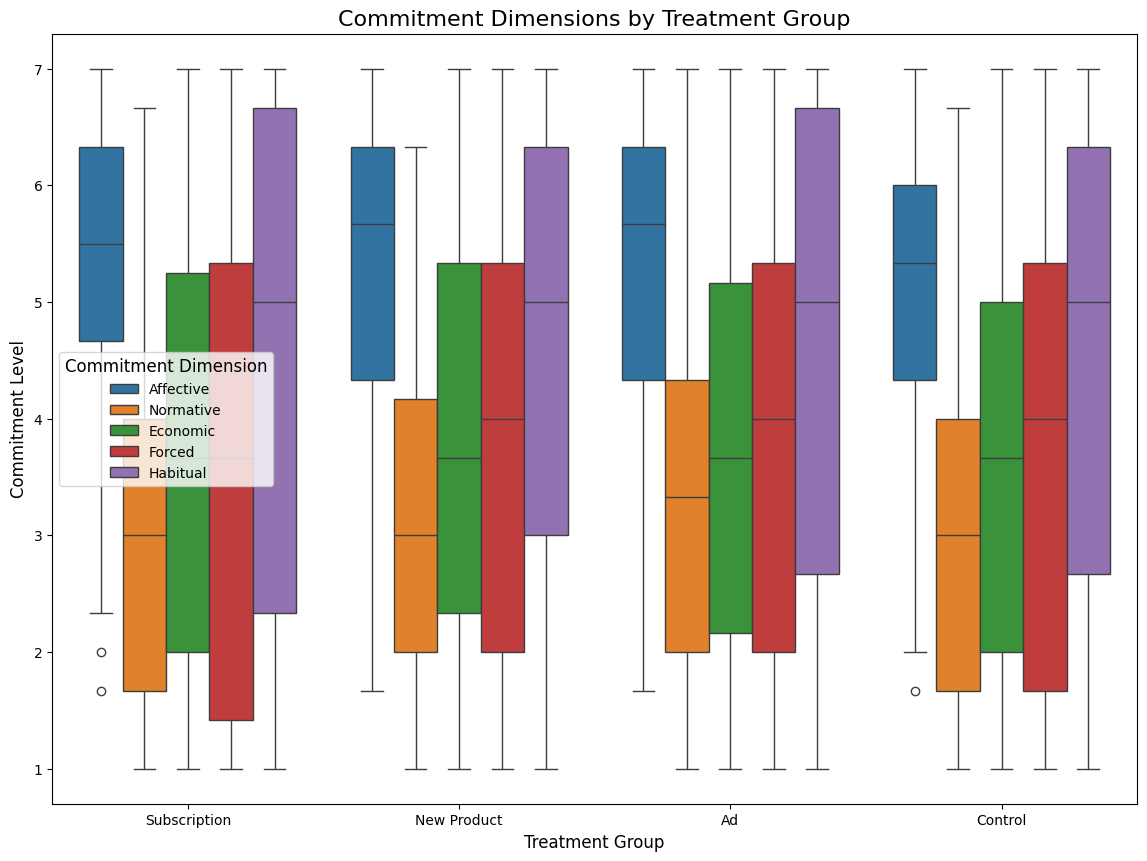

In [7]:
# 8. Commitment Dimensions by Treatment
commitment_dims = ['Affective', 'Normative', 'Economic', 'Forced', 'Habitual']
df['Affective'] = df[['a1', 'a2', 'a3']].mean(axis=1)
df['Normative'] = df[['n1', 'n2', 'n3']].mean(axis=1)
df['Economic'] = df[['e1', 'e2', 'e3']].mean(axis=1)
df['Forced'] = df[['f1', 'f2', 'f3']].mean(axis=1)
df['Habitual'] = df[['h1', 'h2', 'h3']].mean(axis=1)

plt.figure(figsize=(14, 10))
sns.boxplot(x='treatment', y='value', hue='variable',
            data=pd.melt(df, id_vars=['treatment'], value_vars=commitment_dims))
plt.title('Commitment Dimensions by Treatment Group', fontsize=16)
plt.xlabel('Treatment Group', fontsize=12)
plt.ylabel('Commitment Level', fontsize=12)
plt.legend(title='Commitment Dimension', title_fontsize='12', fontsize='10')
plt.show()

    Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
a1 -0.049041  0.054984  0.907905 -0.018313  0.001795
a2  0.298280 -0.145720  0.788745  0.081882  0.028713
a3 -0.119295  0.090551  0.814945  0.024333  0.008210
n1 -0.096397  0.876251  0.067021 -0.016876 -0.018755
n2 -0.121541  0.906497  0.050828 -0.042221 -0.044486
n3 -0.054978  0.939329 -0.089052 -0.005664  0.026790
e1  0.840039 -0.180002  0.166629  0.365549  0.001585
e2  0.847224 -0.116567  0.195523  0.375573 -0.034380
e3  0.856170 -0.194828  0.191937  0.359000 -0.008986
f1  0.892630 -0.126101  0.042360  0.006885  0.322638
f2  0.900064 -0.081160  0.004546 -0.022000  0.314648
f3  0.869209 -0.135497  0.152220 -0.063709  0.339435
h1  0.940477 -0.004415 -0.147846 -0.084563 -0.156852
h2  0.946946 -0.026000 -0.115703 -0.101283 -0.184167
h3  0.941613 -0.024655 -0.114533 -0.051354 -0.155292


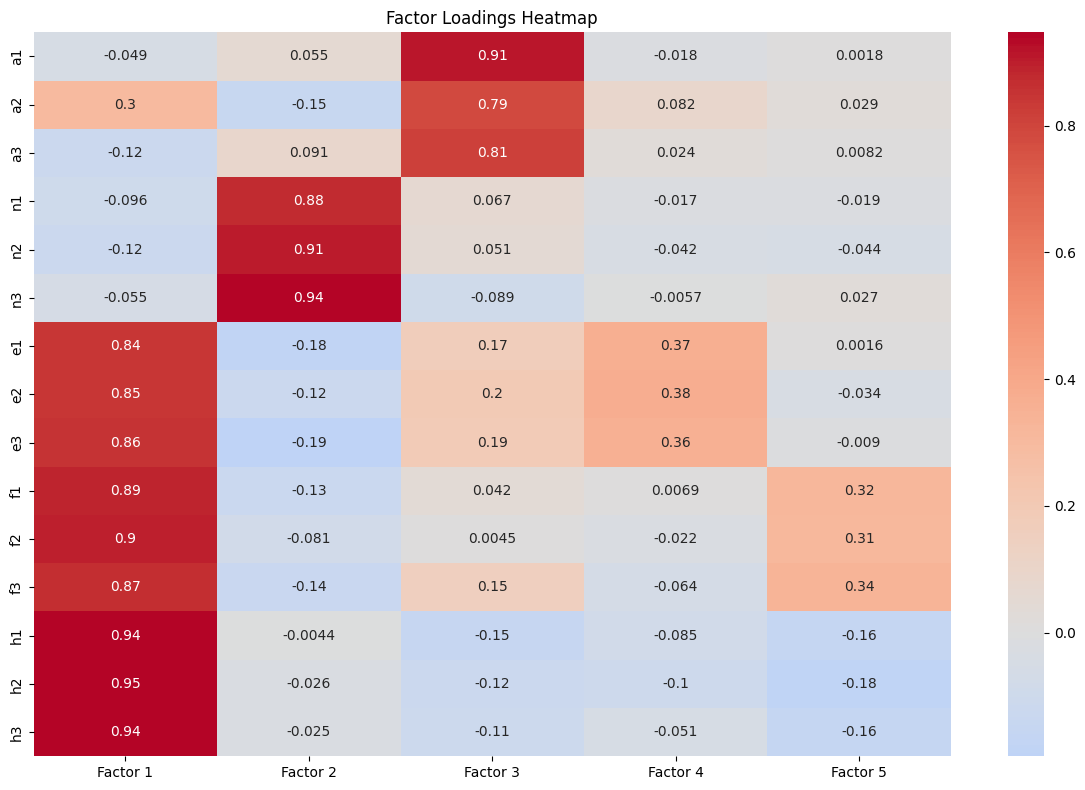

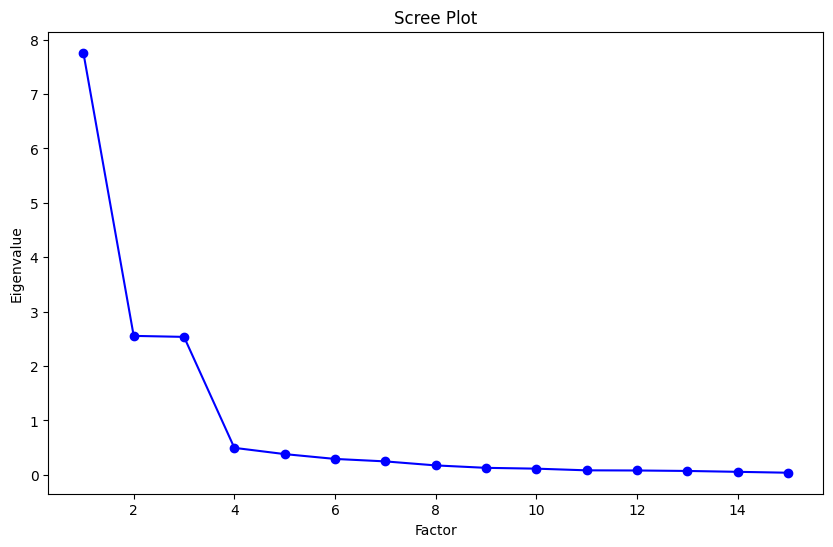

Cronbach's alpha for A factor: 0.611
Cronbach's alpha for N factor: 0.983
Cronbach's alpha for E factor: 0.899
Cronbach's alpha for F factor: 0.968
Cronbach's alpha for H factor: 0.937


In [12]:
# Select commitment items
commitment_items = ['a1', 'a2', 'a3', 'n1', 'n2', 'n3', 'e1', 'e2', 'e3', 'f1', 'f2', 'f3', 'h1', 'h2', 'h3']

# Perform EFA
fa = FactorAnalyzer(rotation='varimax', n_factors=5)
fa.fit(df[commitment_items])

# Get factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, columns=[f'Factor {i+1}' for i in range(5)], index=commitment_items)

# Print factor loadings
print(factor_loadings)

# Plot factor loadings heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(fa.loadings_,
                         columns= [f'Factor {i+1}' for i in range(5)],
                         index=['a1', 'a2', 'a3', 'n1', 'n2', 'n3', 'e1', 'e2', 'e3', 'f1', 'f2', 'f3', 'h1', 'h2', 'h3']),
            annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings Heatmap')
plt.tight_layout()
plt.show()

# Scree plot
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(commitment_items)+1), ev, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

# Calculate Cronbach's alpha for each factor
from scipy.stats import pearsonr

def cronbach_alpha(items):
    item_count = items.shape[1]  # Get the number of items (columns)
    var_sum = np.sum(items.var(axis=0))  # Calculate variance for each column and sum
    total_var = np.var(items.sum(axis=1))  # Calculate variance of the sum of rows
    return (item_count / (item_count - 1)) * (1 - (var_sum / total_var))


for factor in ['a', 'n', 'e', 'f', 'h']:
    items = df[[f'{factor}1', f'{factor}2', f'{factor}3']]
    alpha = cronbach_alpha(items.T)
    print(f"Cronbach's alpha for {factor.upper()} factor: {alpha:.3f}")

     Factor  Eigenvalue  Variance Explained (%)  \
0  Factor 1    7.759341               58.621723   
1  Factor 2    2.553694               18.338800   
2  Factor 3    2.535396               17.620851   
3  Factor 4    0.495363                3.148698   
4  Factor 5    0.380320                2.269931   

   Cumulative Variance Explained (%)  
0                          58.621723  
1                          76.960523  
2                          94.581374  
3                          97.730073  
4                         100.000004  


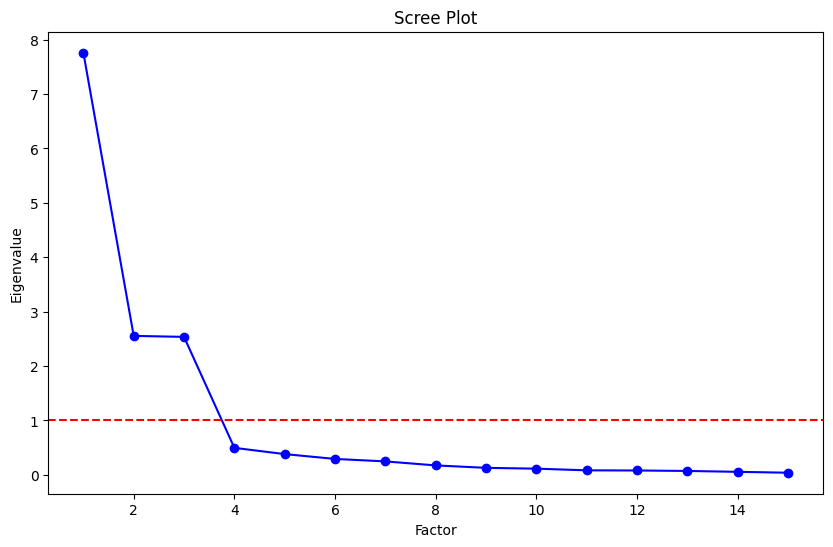

In [15]:
total_variance = np.sum(v)
# Calculate percentage of variance explained
variance_explained = v / total_variance * 100

# Create a DataFrame to display the results
variance_df = pd.DataFrame({
    'Factor': [f'Factor {i+1}' for i in range(5)],
    'Eigenvalue': ev[:5],
    'Variance Explained (%)': variance_explained[:5],
    'Cumulative Variance Explained (%)': np.cumsum(variance_explained[:5])
})

print(variance_df)

# Visualize the scree plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev)+1), ev, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion
plt.show()


In [19]:
# Calculate average loadings for each factor from your factor analysis results
affective_loading = abs(factor_loadings.iloc[0:3, 2].mean())  # Factor 3 for affective
normative_loading = abs(factor_loadings.iloc[3:6, 1].mean())  # Factor 2 for normative
economic_loading = abs(factor_loadings.iloc[6:9, 0].mean())   # Factor 1 for economic
forced_loading = abs(factor_loadings.iloc[9:12, 0].mean())    # Factor 1 for forced
habitual_loading = abs(factor_loadings.iloc[12:15, 0].mean()) # Factor 1 for habitual

# Create the list of loadings
loadings = [affective_loading, normative_loading, economic_loading, forced_loading, habitual_loading]

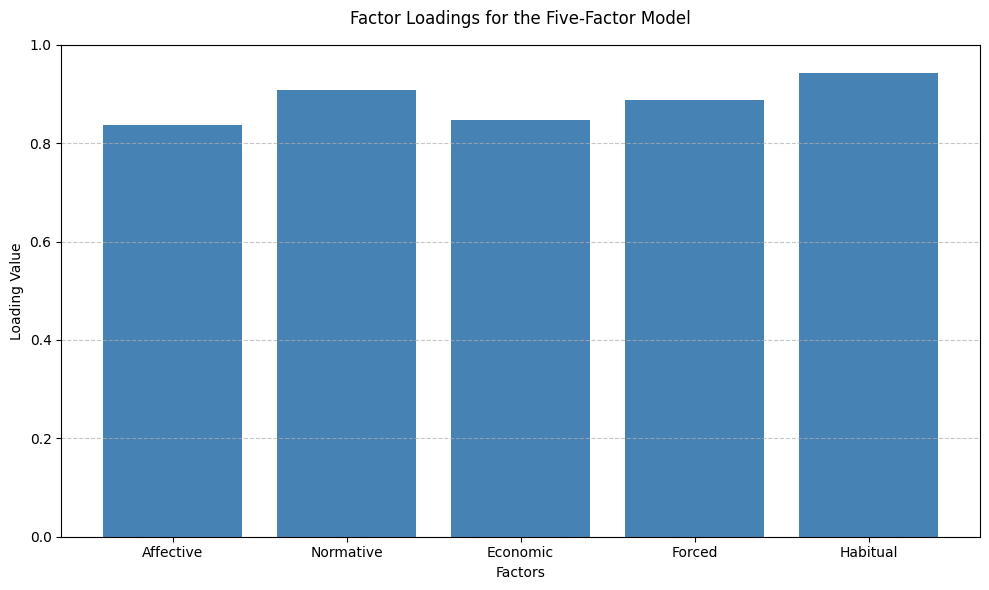

In [20]:
factors = ['Affective', 'Normative', 'Economic', 'Forced', 'Habitual']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(factors, loadings, color='steelblue')

# Customize the plot
plt.title('Factor Loadings for the Five-Factor Model', fontsize=12, pad=15)
plt.ylabel('Loading Value')
plt.xlabel('Factors')

# Set y-axis limits from 0 to 1
plt.ylim(0, 1.0)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the appearance
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
factor_scores_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(5)])

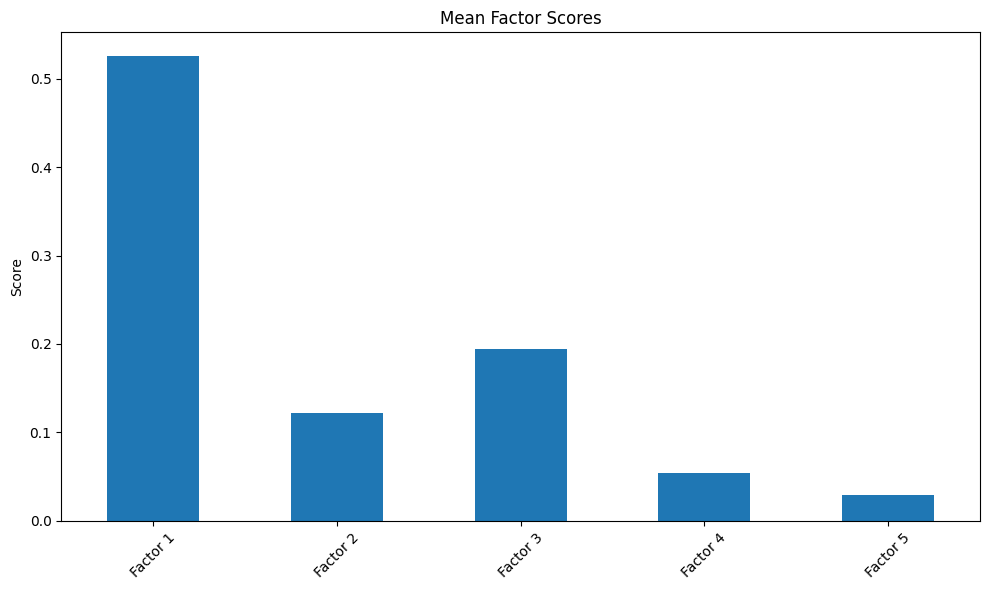

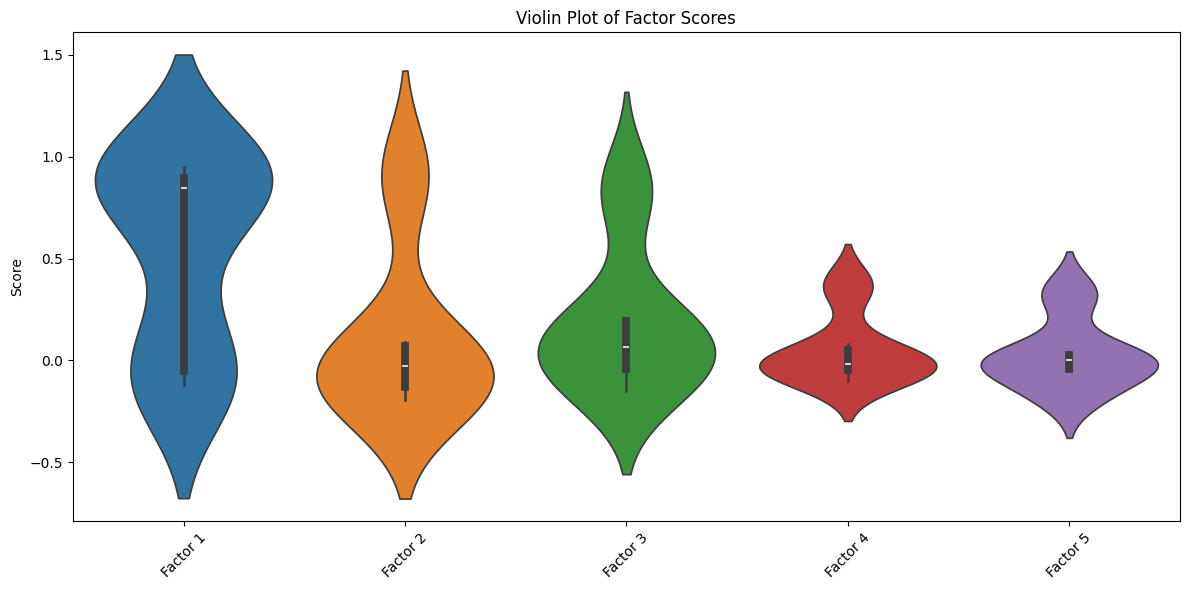

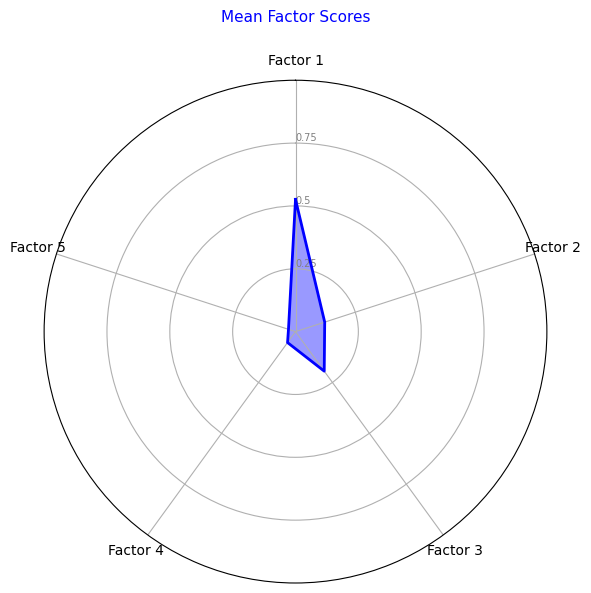

Mean Factor Scores:
Factor 1    0.526093
Factor 2    0.122178
Factor 3    0.194368
Factor 4    0.053816
Factor 5    0.029393
dtype: float64


In [17]:
# Calculate mean factor scores
mean_factor_scores = factor_scores_df.mean()

# Visualizations

# 1. Bar plot of mean factor scores
plt.figure(figsize=(10, 6))
mean_factor_scores.plot(kind='bar')
plt.title('Mean Factor Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Violin plot of factor scores
plt.figure(figsize=(12, 6))
sns.violinplot(data=factor_scores_df)
plt.title('Violin Plot of Factor Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Radar chart of mean factor scores
def make_spider(row, title, color):
    categories = list(mean_factor_scores.index)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
    plt.ylim(0, 1)

    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    plt.title(title, size=11, color=color, y=1.1)

plt.figure(figsize=(6, 6))
make_spider(mean_factor_scores, "Mean Factor Scores", "blue")
plt.tight_layout()
plt.show()

# Print mean factor scores
print("Mean Factor Scores:")
print(mean_factor_scores)

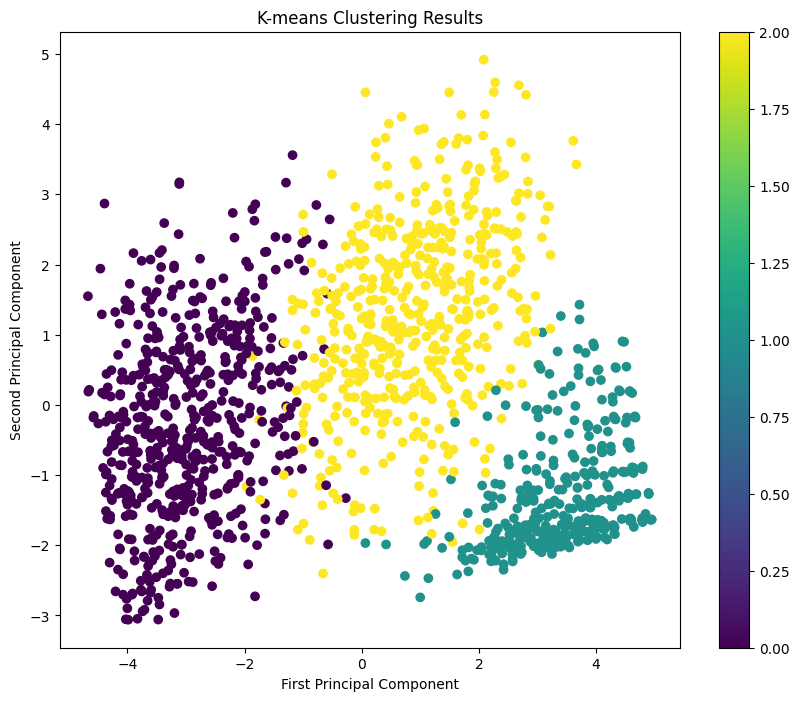

         a1        a2        a3        n1        n2        n3        e1  \
0  0.354283 -0.123271  0.420964  0.214629  0.244223  0.110670 -0.941982   
1  0.525934  1.085446  0.328201 -0.945098 -0.984611 -1.078874  1.231757   
2 -0.804348 -0.671463 -0.733197  0.460502  0.455897  0.681112  0.166034   

         e2        e3        f1        f2        f3        h1        h2  \
0 -0.936314 -0.953585 -0.997390 -1.019471 -0.924486 -1.064446 -1.054910   
1  1.178416  1.264799  1.015499  0.938264  1.069498  0.763554  0.809186   
2  0.199481  0.154676  0.392333  0.475806  0.267485  0.658874  0.613617   

         h3  
0 -1.046928  
1  0.813703  
2  0.600994  


In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[commitment_items])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters using first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Calculate cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=commitment_items)
print(cluster_centroids)

Number of items in each cluster:
cluster
0    597
1    387
2    516
Name: count, dtype: int64


<ipython-input-15-2fe8218192ed>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Count', data=cluster_counts_df, palette='viridis')


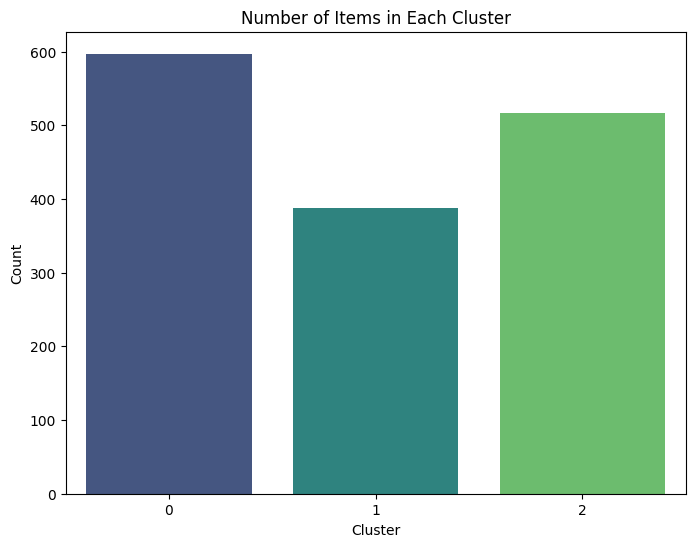

In [15]:
# Count the number of items in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print("Number of items in each cluster:")
print(cluster_counts)

# Count the number of items in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Convert to DataFrame for easy plotting
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Count', data=cluster_counts_df, palette='viridis')
plt.title('Number of Items in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


               a1        a2        a3        n1        n2        n3        e1  \
cluster                                                                         
0        5.788945  5.137353  5.804020  3.547739  3.266332  3.219430  1.929648   
1        6.025840  6.875969  5.679587  1.798450  1.493540  1.276486  6.010336   
2        4.189922  4.348837  4.255814  3.918605  3.571705  4.151163  4.009690   

               e2        e3        f1        f2        f3        h1        h2  \
cluster                                                                         
0        2.105528  1.824121  1.762144  1.554439  1.780570  2.348409  2.283082   
1        5.943152  6.237726  5.935401  5.700258  5.723514  6.240310  6.229974   
2        4.166667  4.029070  4.643411  4.720930  4.137597  6.017442  5.815891   

               h3  
cluster            
0        2.294807  
1        6.193798  
2        5.748062  


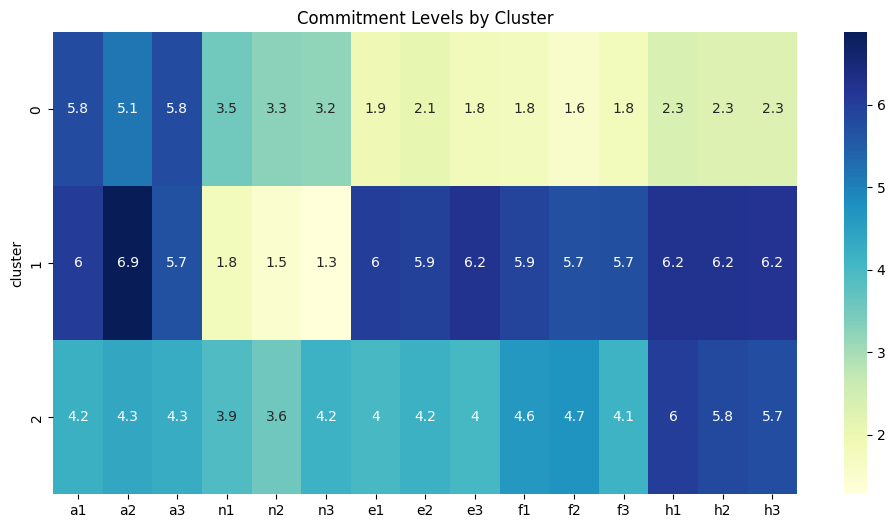

In [11]:
# Calculate mean commitment scores for each cluster
cluster_means = df.groupby('cluster')[commitment_items].mean()
print(cluster_means)

# Visualize commitment levels by cluster
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu')
plt.title('Commitment Levels by Cluster')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 intent   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     62.60
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          5.67e-146
Time:                        09:11:13   Log-Likelihood:                -1726.1
No. Observations:                1500   AIC:                             3484.
Df Residuals:                    1484   BIC:                             3569.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2255      0.118     18.801      0.0

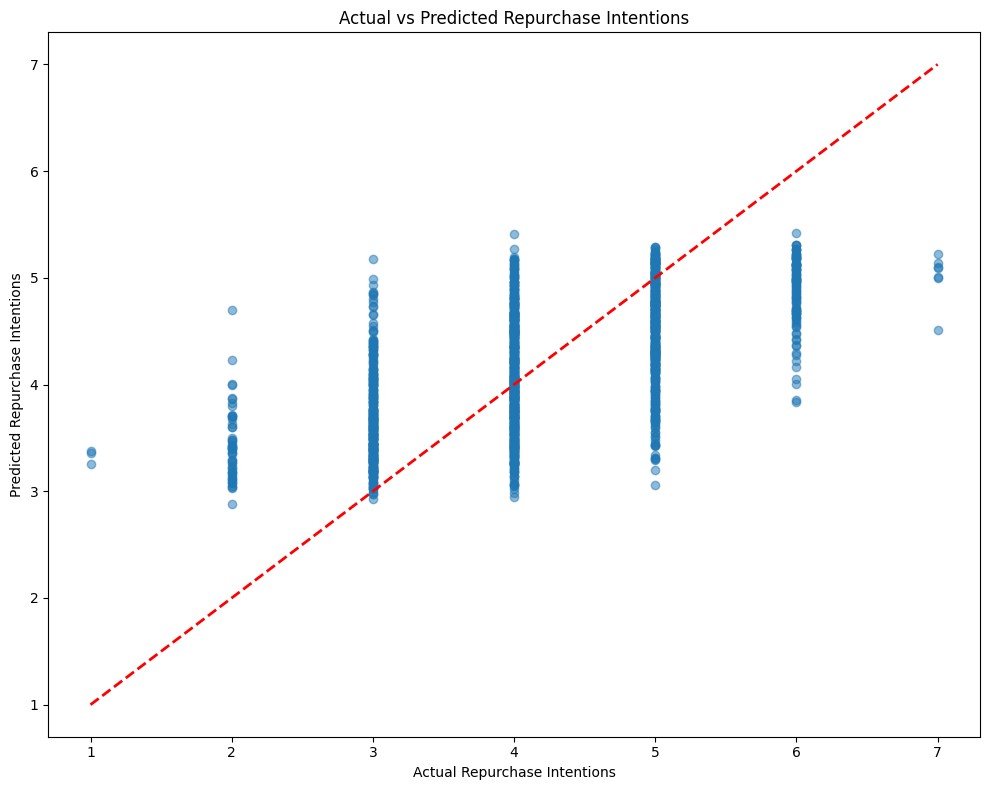

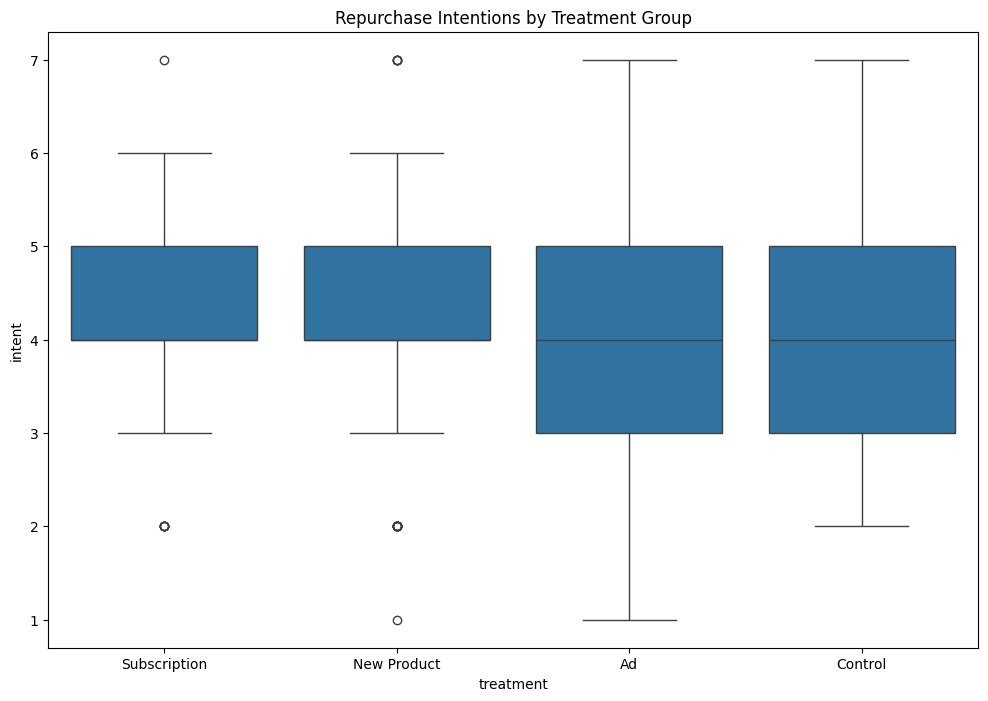

In [12]:
# Prepare the data for regression
X = df[commitment_items]
X = sm.add_constant(X)
y = df['intent']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y, model.predict(), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Repurchase Intentions')
plt.ylabel('Predicted Repurchase Intentions')
plt.title('Actual vs Predicted Repurchase Intentions')
plt.tight_layout()
plt.show()

# 5. Experimental Results Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='treatment', y='intent', data=df)
plt.title('Repurchase Intentions by Treatment Group')
plt.show()

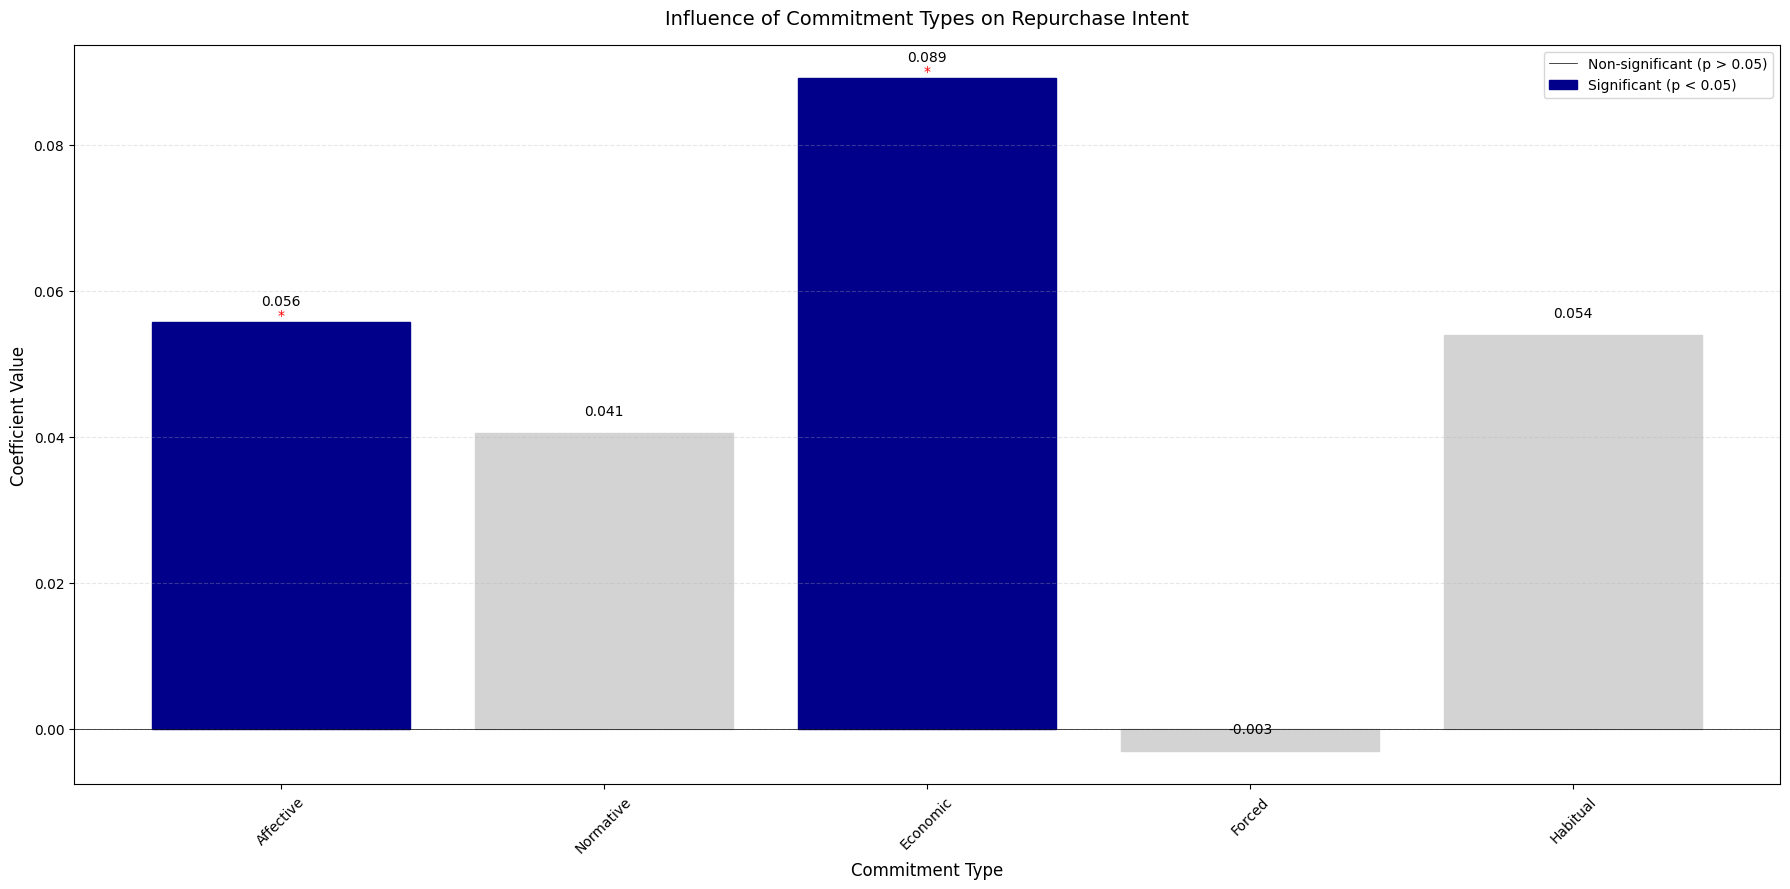

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the coefficient values from your regression results
coefficients = pd.DataFrame({
    'Commitment_Type': ['Affective', 'Normative', 'Economic', 'Forced', 'Habitual'],
    'Coefficient': [0.0557, 0.0406, 0.0891, -0.0030, 0.0540],  # Using the highest coefficient for each type
    'P_Value': [0.040, 0.192, 0.007, 0.919, 0.132]  # Using the corresponding p-values
})

# Create a boolean mask for significant coefficients (p < 0.05)
coefficients['Significant'] = coefficients['P_Value'] < 0.05

# Create the bar plot
plt.figure(figsize=(18, 9))
bars = plt.bar(coefficients['Commitment_Type'], coefficients['Coefficient'])

# Color the bars based on significance
for i, bar in enumerate(bars):
    if coefficients['Significant'].iloc[i]:
        bar.set_color('darkblue')
    else:
        bar.set_color('lightgray')

# Customize the plot
plt.title('Influence of Commitment Types on Repurchase Intent', fontsize=14, pad=15)
plt.xlabel('Commitment Type', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on top of each bar
for i, v in enumerate(coefficients['Coefficient']):
    plt.text(i, v + 0.002, f'{v:.3f}', ha='center', va='bottom')

# Add significance indicators
for i, (significant, pvalue) in enumerate(zip(coefficients['Significant'], coefficients['P_Value'])):
    if significant:
        plt.text(i, coefficients['Coefficient'].iloc[i], '*', ha='center', va='bottom', color='red')

# Add a legend
plt.legend(['Non-significant (p > 0.05)', 'Significant (p < 0.05)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Calculate mean commitment scores for each treatment group
treatment_means = df.groupby('treatment')[commitment_items].mean()
print(treatment_means)

# Perform ANOVA to test for significant differences between treatment groups
from scipy import stats

for item in commitment_items:
    f_value, p_value = stats.f_oneway(
        df[df['treatment'] == 'Control'][item],
        df[df['treatment'] == 'Ad'][item],
        df[df['treatment'] == 'New Product'][item],
        df[df['treatment'] == 'Subscription'][item]
    )
    print(f"ANOVA results for {item}: F-value = {f_value:.3f}, p-value = {p_value:.3f}")

                    a1        a2        a3        n1        n2        n3  \
treatment                                                                  
Ad            5.272237  5.318059  5.320755  3.264151  3.016173  3.183288   
Control       5.230337  5.308989  5.126404  3.185393  2.873596  2.980337   
New Product   5.330667  5.322667  5.221333  3.288000  2.904000  3.024000   
Subscription  5.359296  5.309045  5.281407  3.160804  2.864322  2.969849   

                    e1        e2        e3        f1        f2        f3  \
treatment                                                                  
Ad            3.711590  3.827493  3.741240  3.854447  3.752022  3.684636   
Control       3.705056  3.761236  3.693820  3.834270  3.741573  3.609551   
New Product   3.722667  3.885333  3.786667  3.914667  3.749333  3.669333   
Subscription  3.655779  3.746231  3.665829  3.723618  3.618090  3.479899   

                    h1        h2        h3  
treatment                                